<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_1/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 09/12/2025 <br>
ECGR 4105 - Homework 1, Problem 1

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/D3.csv'
df = pd.read_csv(url)

#Confirm successful import by printing
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
#Extrapolate data from .csv file
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]
m = len(Y) #number of training examples
n = len(X1)

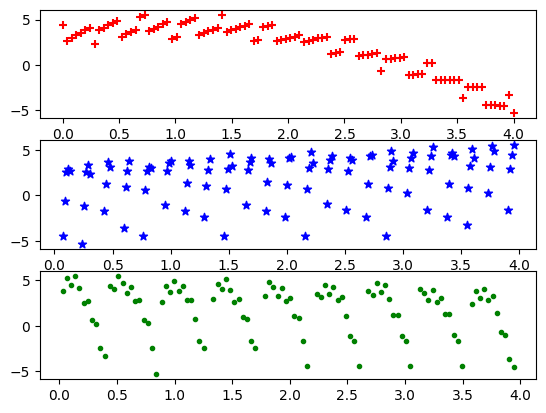

In [ ]:
#Visualize each set with respect to Y in 2D
fig = plt.figure()
ax1 = fig.add_subplot(311) # 3 row, 1 columns, 1st subplot
ax2 = fig.add_subplot(312) # 3 row, 1 columns, 2nd subplot
ax3 = fig.add_subplot(313) # 3 row, 1 columns, 3rd subplot

ax1.scatter(X1, Y, color='red', marker='+') #X1 w/ respect to Y
ax2.scatter(X2, Y, color='blue', marker='*') #X2 w/ respect to Y
ax3.scatter(X3, Y, color='green', marker='.') #X3 w/ respect to Y

In [ ]:
#Reorganize data into matrix capable of multiplication
#Start by transposing input vectors
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
X3 = X3.reshape(n, 1)

#Create column vector of all 1's
X0 = np.ones((n, 1))

#Stack each input with ones column vector
X1 = np.hstack((X0, X1))
X2 = np.hstack((X0, X2))
X3 = np.hstack((X0, X3))

#Preview the first 3 rows of each new matrix
print(X1[:3])
print(X2[:3])
print(X3[:3])

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]]
[[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]]
[[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]]


In [ ]:
#Set parameters for training
theta = [0., 0.] #will need 4 values for problem 2
iterations = 1500 #set number of loops
alpha = 0.01 #learning ratio 0.1 - 0.01

In [ ]:
#Define the cost fucntion discussed in class
def cost_function(X, Y, theta):
  """
  Calculates the cost function for linear regression
  Input:
    X: Input feature matrix including X0
    Y: Epected output variable vector
    theta: The weights/fitting parameters vector
  Output:
    Calculated cost 'J'
  """
  h_x = X.dot(theta) #X dot product theta gives matrix of predicted output
  J = (1/(2*m)) * np.sum(np.square(h_x - Y)) #formula for J (given)

  return J

In [ ]:
#Define gradient descent function discussed in class
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Calculates the gradient descent to find ideal theta values
    Input:
      X: Input feature matrix
      Y: Expected output vector
      theta: array of weights/fitting parameters
      alpha: learning rate (scalar value)
      iterations: number of loops to run (scalar value)
    Output:
      theta: updated value for each weight/fitting parameter
      cost_history: tracks the cost over time for each iteration
      """
    cost_history = np.zeros(iterations) #initialize vector with zeros

    for i in range(iterations): #loop for each iteration
        h_x = X.dot(theta) #calculate predicted output
        gradient = X.transpose().dot(np.subtract(h_x, Y)) / m #gradient of J
        theta = theta - alpha * gradient #update theta values
        cost_history[i] = cost_function(X, Y, theta)

    return theta, cost_history

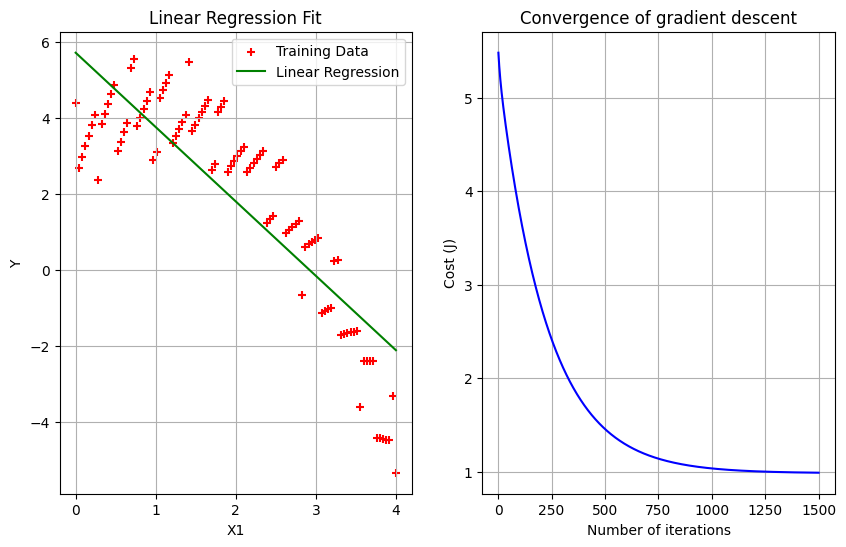

In [ ]:
#Display results for parameter X1
theta, cost_history_X1 = gradient_descent(X1, Y, theta, alpha, iterations)
#print('Final value of theta =', theta)
#print('cost_history =', cost_history_X1)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121) # 1 row, 2 columns, 1st subplot
ax2 = fig.add_subplot(122) # 1 row, 2 columns, 2nd subplot

# Plot for the training data and linear regression result
ax1.scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data')
ax1.plot(X1[:, 1], X1.dot(theta), color='green', label='Linear Regression')
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.set_title('Linear Regression Fit')
ax1.legend()

#Plot cost over time
ax2.plot(range(1, iterations + 1), cost_history_X1, color='blue')
ax2.grid(True)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost (J)')
ax2.set_title('Convergence of gradient descent')

plt.show()

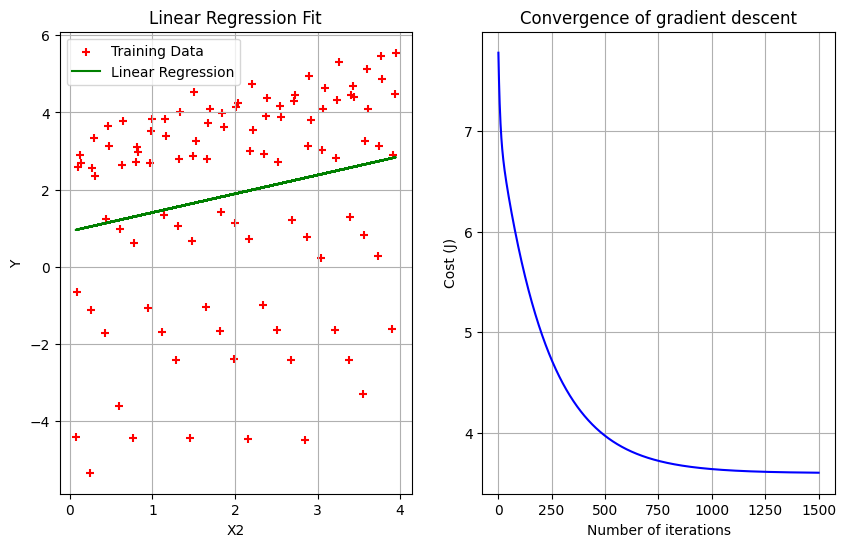

In [ ]:
#Display results for parameter X2
theta, cost_history_X2 = gradient_descent(X2, Y, theta, alpha, iterations)
#print('Final value of theta =', theta)
#print('cost_history =', cost_history_X2)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121) # 1 row, 2 columns, 1st subplot
ax2 = fig.add_subplot(122) # 1 row, 2 columns, 2nd subplot

# Plot for the training data and linear regression result
ax1.scatter(X2[:, 1], Y, color='red', marker='+', label='Training Data')
ax1.plot(X2[:, 1], X2.dot(theta), color='green', label='Linear Regression')
ax1.grid(True)
ax1.set_xlabel('X2')
ax1.set_ylabel('Y')
ax1.set_title('Linear Regression Fit')
ax1.legend()

#Plot cost over time
ax2.plot(range(1, iterations + 1), cost_history_X2, color='blue')
ax2.grid(True)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost (J)')
ax2.set_title('Convergence of gradient descent')

plt.show()

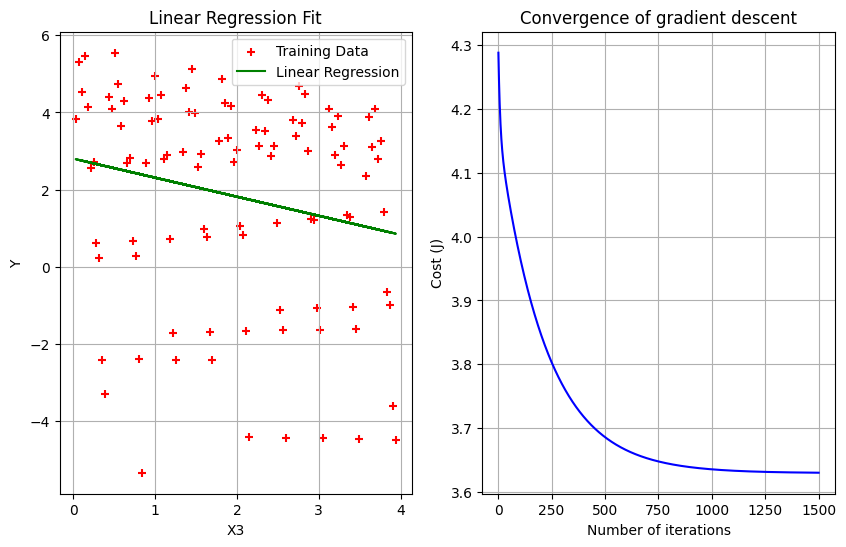

In [ ]:
#Display results for parameter X3
theta, cost_history_X3 = gradient_descent(X3, Y, theta, alpha, iterations)
#print('Final value of theta =', theta)
#print('cost_history =', cost_history_X3)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121) # 1 row, 2 columns, 1st subplot
ax2 = fig.add_subplot(122) # 1 row, 2 columns, 2nd subplot

# Plot for the training data and linear regression result
ax1.scatter(X3[:, 1], Y, color='red', marker='+', label='Training Data')
ax1.plot(X3[:, 1], X3.dot(theta), color='green', label='Linear Regression')
ax1.grid(True)
ax1.set_xlabel('X3')
ax1.set_ylabel('Y')
ax1.set_title('Linear Regression Fit')
ax1.legend()

#Plot cost over time
ax2.plot(range(1, iterations + 1), cost_history_X3, color='blue')
ax2.grid(True)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost (J)')
ax2.set_title('Convergence of gradient descent')

plt.show()

In [ ]:
#Check final cost of all 3 features
print("Final cost (X1): ", round(cost_history_X1[-1], 4))
print("Final cost (X2): ", round(cost_history_X2[-1], 4))
print("Final cost (X3): ", round(cost_history_X3[-1], 4))

Final cost (X1):  0.9906
Final cost (X2):  3.6038
Final cost (X3):  3.6301


Based on the plots above, X1 has the lowest cost for explaining the output Y. After 1500 iterations the cost settled around 0.99, whereas X2 and X3 settled around 3.60 and 3.63 respectively. This is with a selected learning rate of 0.01. It may be possible to achieve a similar cost in less iterations with a larger learning rate.
<br> <br>
When adjusting the learning rate "alpha" to 0.05 and reducing the number of iterations to 1000 the costs are largely unaffected. Now becoming: 0.985, 3.599, and 3.629 respectively. Observing the plots of cost per iteration they reach a stable value much quicker. It takes less than 200 iterations where previously it took approximately 750 for each feature.
<br><br>
Even at a learning rate of 0.1 there was no overfitting observed.